### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme()

In [2]:
marathon = pd.read_csv("marathon-data.csv")
marathon.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [3]:
marathon.shape

(37250, 4)

In [4]:
marathon.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

By default, Pandas loaded the time columns as Python strings (type object); we can see convert this using to_timedelta()

In [5]:
marathon['split'],marathon['final'] = pd.to_timedelta(marathon['split']),pd.to_timedelta(marathon['final'])
marathon.head()

,age,gender,split,final
0,33,M,0 days 01:05:38,0 days 02:08:51
1,32,M,0 days 01:06:26,0 days 02:09:28
2,31,M,0 days 01:06:49,0 days 02:10:42
3,38,M,0 days 01:06:16,0 days 02:13:45
4,31,M,0 days 01:06:32,0 days 02:13:59


In [6]:
marathon.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

For the purpose of our Seaborn plotting utilities, let’s next add columns that give the times in seconds

- data['split'].astype(int) converts the timedelta64[ns] data to integers, which represent the duration in nanoseconds.
- Dividing by 1E9 converts the nanoseconds to seconds.

In [7]:
marathon['split_sec'] , marathon['final_sec'] = marathon['split'].astype('int64')/1E9,marathon['final'].astype('int64')/1E9
marathon.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0


 To get an idea of what the data looks like, we can plot a jointplot over the data

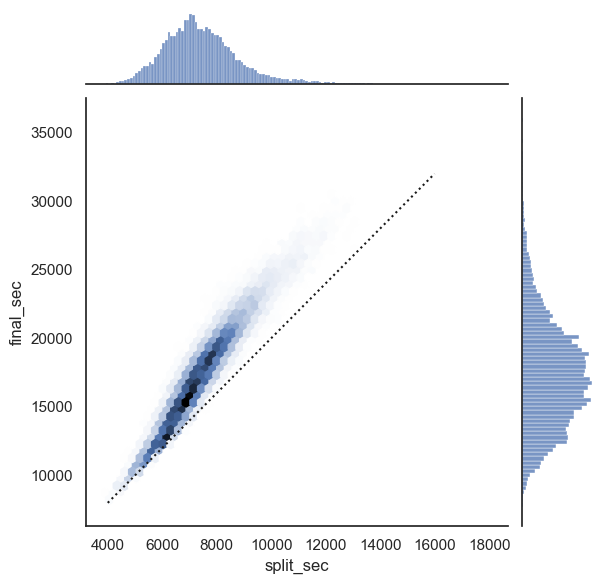

In [8]:
with sns.axes_style('white'):
    g = sns.jointplot(marathon,x="split_sec", y="final_sec", kind='hex')    #kind = hex -->Hex Plot
    g.ax_joint.plot(np.linspace(4000, 16000),np.linspace(8000, 32000), ':k') #to plot a reference line on a joint plot in Seaborn.

- The dotted line shows where someone’s time would lie if they ran the marathon at aperfectly steady pace.
- The fact that the distribution lies above this indicates (as you might expect) that most people slow down over the course of the marathon.
- If you have run competitively, you’ll know that those who do the opposite—run faster during the second half of the race—are said to have “negative-split” the race.

Let create a column to measure the runner negative-splits or positive-splits the race

In [9]:
marathon['split_frac'] = 1 - 2 * marathon['split_sec'] / marathon['final_sec']
marathon.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842


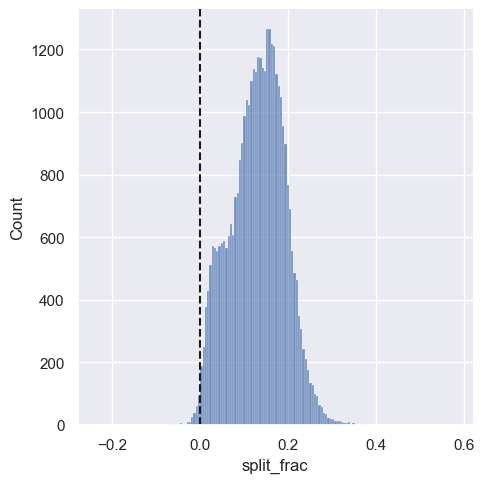

In [10]:
sns.displot(marathon['split_frac'])
plt.axvline(0, color="k", linestyle="--");

In [11]:
sum(marathon['split_frac']<0)

251

- Out of nearly 40,000 participants, there were only 250 people who negative-split their
 marathon.

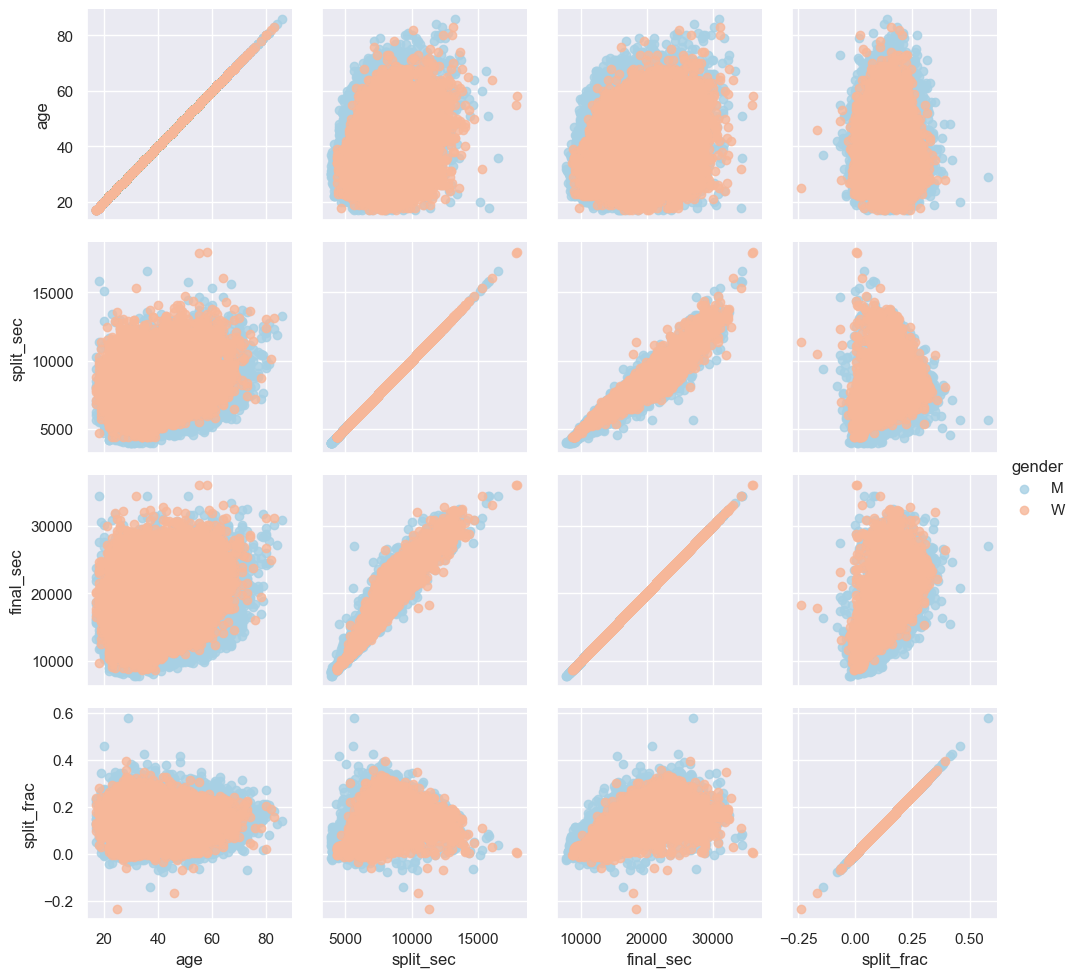

In [ ]:
pg = sns.PairGrid(marathon, vars=['age', 'split_sec', 'final_sec', 'split_frac'],
 hue='gender', palette='RdBu_r')
pg.map(plt.scatter, alpha=0.8)  # Map the plots to the grid and add a legend
pg.add_legend();

Explore split based on gender

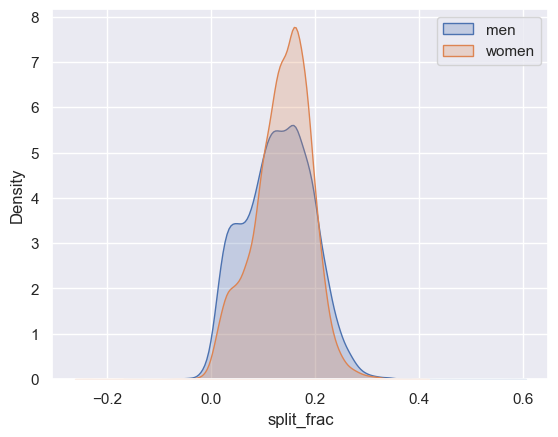

In [22]:
sns.kdeplot(marathon.split_frac[marathon.gender=='M'], label='men', fill=True)
sns.kdeplot(marathon.split_frac[marathon.gender=='W'], label='women', fill=True)
plt.xlabel('split_frac')
plt.legend();

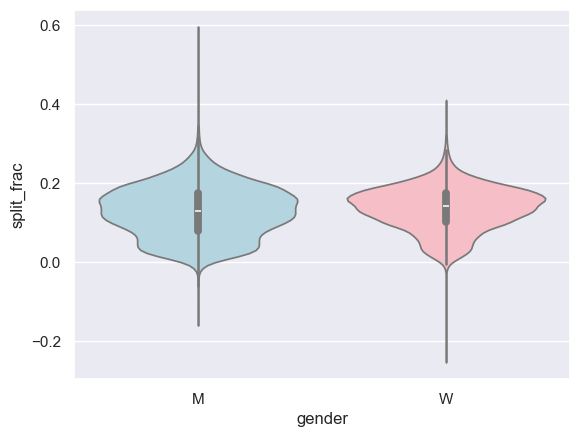

In [ ]:
sns.violinplot(x="gender",y= "split_frac", data=marathon,hue='gender',palette=["lightblue", "lightpink"]); # without hue we cannot pass palette

- This almost looks like some kind of bimodal distribution among the men and women.
-  Let’s see if we can suss out what’s going on by looking at the distributions as a function of age.

Create a new column to know the age decade of each and every participants

In [23]:
marathon['age_dec'] = marathon.age.map(lambda age: 10 * (age // 10))
marathon.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097,30
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842,30


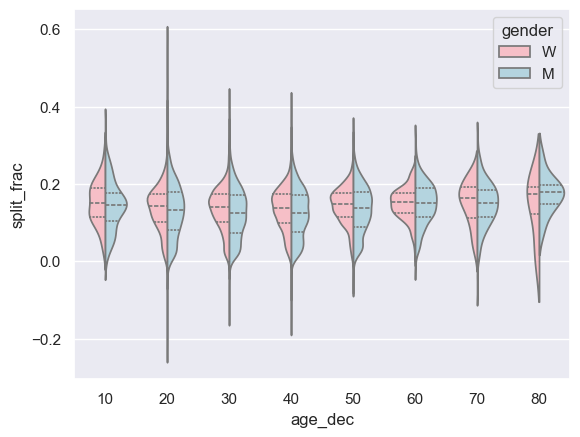

In [ ]:
with sns.axes_style(style=None):
 sns.violinplot(x="age_dec", y="split_frac", hue="gender", data=marathon, split=True, inner="quartile", palette=["lightpink","lightblue"]);

- we can see where the distributions of men and women differ: the split distributions of men in their 20s to 50s show a pronounced over-density toward lower splits when compared to women of the same age (or of any age, for that matter).
- Also surprisingly, the 80-year-old women seem to outperform everyone in terms of their split time. This is probably due to the fact that we’re estimating the distribution from small numbers, as there are only a handful of runners in that range

In [ ]:
sum(marathon['age'] >80) # (marathon.age >80).sum() also applicable

7

- Back to the men with negative splits: who are these runners? Does this split fraction correlate with finishing quickly? We can plot this very easily. We’ll use regplot, which will automatically fit a linear regression to the data

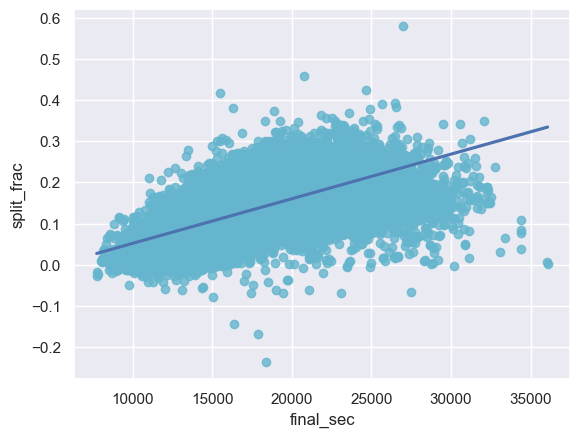

In [42]:
g = sns.regplot(x='final_sec',y='split_frac', data=marathon,scatter_kws=dict(color='c'))

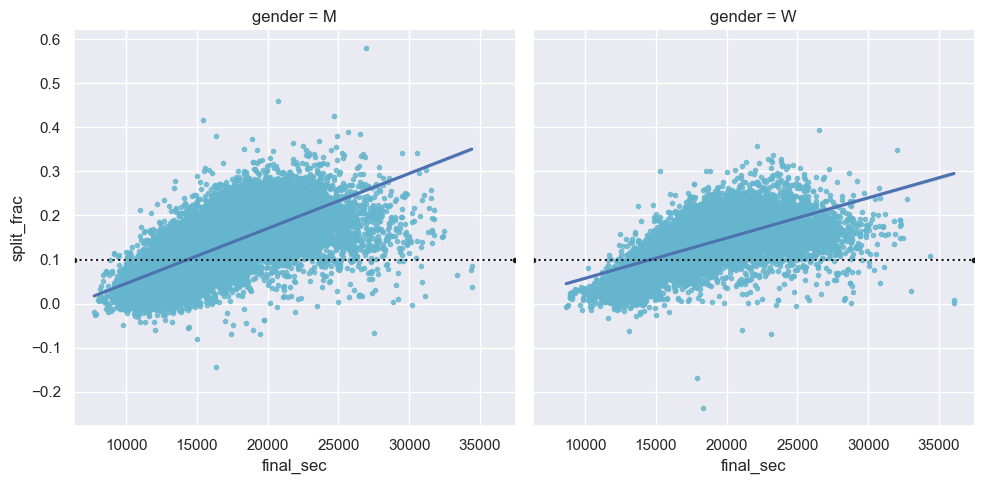

In [38]:
g = sns.lmplot(x='final_sec',y='split_frac', col='gender', data=marathon,markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":");

- Apparently the people with fast splits are the elite runners who are finishing within ~15,000 seconds, or about 4 hours. People slower than that are much less likely to have a fast second split.